In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dax = pd.read_excel("DAX_prognose.xlsx")
dax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
company             210 non-null object
ISIN                210 non-null object
industry            210 non-null object
KPI                 210 non-null object
year                210 non-null int64
value               204 non-null float64
value in billion    204 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 11.6+ KB


In [2]:
dax.describe(include="all")

,company,ISIN,industry,KPI,year,value,value in billion
count,210,210,210,210,210.000000,2.040000e+02,204.000000
unique,30,30,7,2,NaN,NaN,NaN
top,RWE,DE0005140008,"Mechanical engineering, transport, logistics",revenue,NaN,NaN,NaN
freq,7,7,49,120,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2019.714286,3.337922e+10,33.902696
std,NaN,NaN,NaN,NaN,1.032619,7.512537e+10,74.084693
min,NaN,NaN,NaN,NaN,2018.000000,-6.900000e+08,-0.690000
25%,NaN,NaN,NaN,NaN,2019.000000,4.067500e+09,4.067500
50%,NaN,NaN,NaN,NaN,2020.000000,1.208500e+10,12.085000
75%,NaN,NaN,NaN,NaN,2021.000000,3.559000e+10,35.590000


In [3]:
dax.head()

,company,ISIN,industry,KPI,year,value,value in billion
0,adidas,DE000A1EWWW0,Retail and consumer goods,revenue,2021,2.339000e+10,23.39
1,Allianz,DE0008404005,Finance,revenue,2021,1.000000e+11,147.88
2,BASF,DE000BASF111,"Chemical, Pharma, Bio- and Medical Technology",revenue,2021,5.977000e+10,59.77
3,Bayer,DE000BAY0017,"Chemical, Pharma, Bio- and Medical Technology",revenue,2021,4.624000e+10,46.24
4,Beiersdorf,DE0005200000,Retail and consumer goods,revenue,2021,7.970000e+09,7.97


In [4]:
dax["KPI"].unique()

array(['revenue', 'EBITDA'], dtype=object)

In [5]:
#first we want to have a look at the KPI 
revenue = dax[(dax['KPI'] == 'revenue')]
revenue = revenue.drop(["ISIN", "KPI", "value"], axis=1)
revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 209
Data columns (total 4 columns):
company             120 non-null object
industry            120 non-null object
year                120 non-null int64
value in billion    117 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.7+ KB


In [6]:
#rename value column 
revenue.rename(columns={"value in billion":"revenue in billion"}, inplace=True)
#as there are not enough information to fill na values we want to find out which rows contain NaN values
revenue[revenue.isna().any(axis=1)]

,company,industry,year,revenue in billion
181,Allianz,Finance,2018,NaN
189,Deutsche Bank,Finance,2018,NaN
203,Münchener Rückversicherungs-Gesellschaft,Finance,2018,NaN


In [7]:
#drop all values fpr Deutsche Bank, Alianz and Münchener Rückversicherungs-Gesellschaft
revenue = revenue.drop(revenue[revenue["company"] == "Allianz"].index)
revenue = revenue.drop(revenue[revenue["company"] == "Deutsche Bank"].index)
revenue = revenue.drop(revenue[revenue["company"] == "Münchener Rückversicherungs-Gesellschaft"].index)

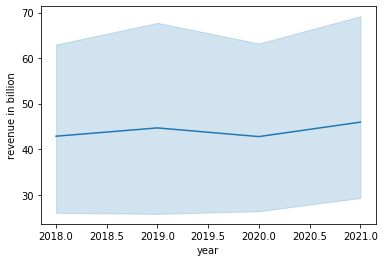

In [8]:
sns.lineplot(x="year", y="revenue in billion", data=revenue)


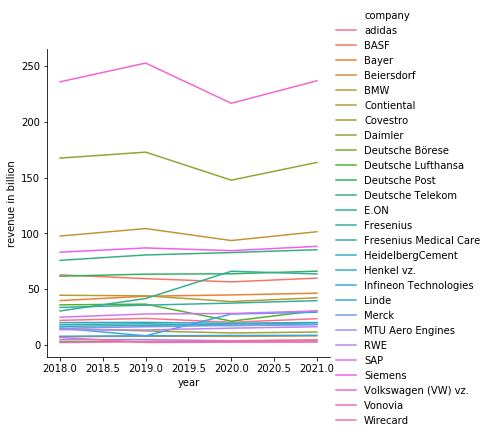

In [9]:
sns.relplot(x="year", y="revenue in billion", hue ="company", kind="line", data=revenue)

In [10]:
#as this is a bit too detailed for us, we now want to have a closer look at the industries 
revenue_pivot = revenue.pivot_table(index = "year", columns = "industry", aggfunc = "mean")
revenue_pivot

revenue in billion  \
industry Chemical, Pharma, Bio- and Medical Technology   
year                                                     
2018                                         28.800000   
2019                                         29.198571   
2020                                         29.167143   
2021                                         30.707143   

                                                                       \
industry Electronics, Hard- and Software Energy and resources Finance   
year                                                                    
2018                              38.600                21.90   4.700   
2019                              41.168                27.38   2.505   
2020                              41.368                40.41   2.765   
2021                              43.348                39.84   2.885   

                                                               \
industry Mechanical engineering, transport, logistics   Other   
year                                                            
2018                                        92.428571  16.500   
2019                                        96.835714  13.440   
2020                                        83.544286  22.380   
2021                                        92.071429  23.645   

                                    
industry Retail and consumer goods  
year                                
2018                        14.550  
2019                        15.645  
2020                        13.825  
2021                        15.680

Text(0.5, 1.0, 'Expected Development of Avg. Revenue among DAX-Industries')

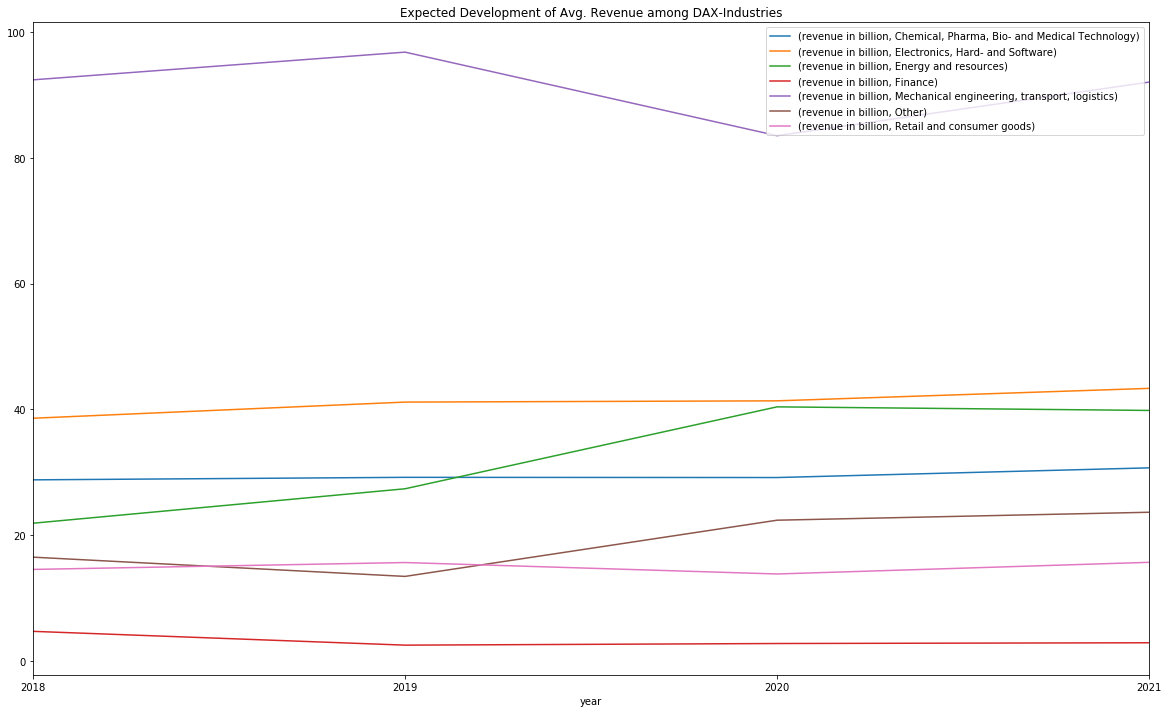

In [11]:
revenue_pivot.plot(figsize=(20,12), legend = "middle")
plt.legend()
plt.xticks(np.arange(min(revenue["year"]), max(revenue["year"]+1), 1.0))
plt.title("Expected Development of Avg. Revenue among DAX-Industries")